In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X = iris.data
y = iris.target

In [19]:
X = X[y != 0, :2]
y = y[y != 0]

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=100)

In [20]:

for kernel in ("linear", "rbf", "poly"):
    svc = svm.SVC(kernel=kernel,gamma=10)
    svc.fit(x_train,y_train)

    print('using kernel:', kernel)

    print(svc.decision_function(x_test))

    print(svc.score(x_test,y_test))


using kernel: linear
[ 0.27237522  1.18109245  1.18108588 -0.09107949 -0.2728052   0.81761476
  0.99935689 -0.27282819 -0.09107949 -0.09108606]
0.5
using kernel: rbf
[-0.18657931  0.79567292  0.47552112 -0.43634065  0.28894133  0.86949851
  1.00012204 -0.32436197 -0.43634065 -0.11929164]
0.5
using kernel: poly
[  7.92216988  17.08810536  18.49785948  -3.76953701   7.9568249
   9.95892552  14.27293537 -10.35127161  -3.76953701  -6.88020275]
0.4


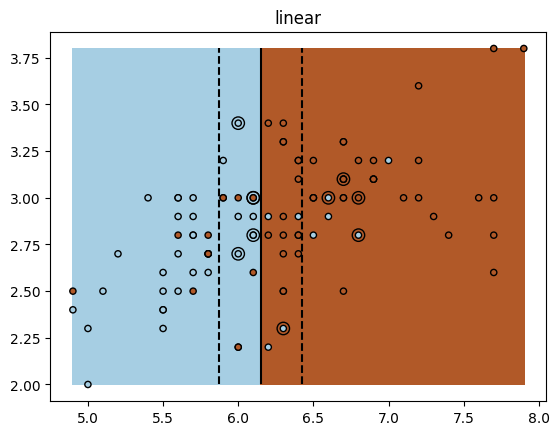

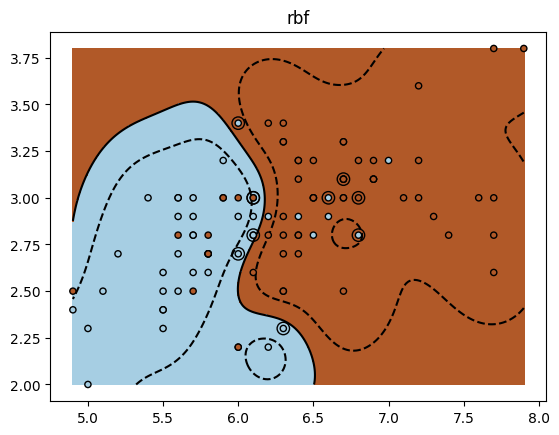

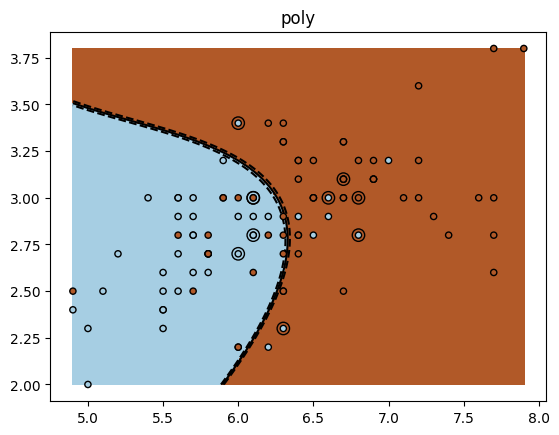

In [21]:
#Scikit learn solution to watch the plot of eny graph, in my solution you can watch the numeric accuracy
for kernel in ("linear", "rbf", "poly"):
    svc = svm.SVC(kernel=kernel,gamma=10)
    svc.fit(x_train,y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        x_test[:, 0], x_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]

    Z = svc.decision_function(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
plt.show()

